# 🚀 Day18: k-Nearest Neighbors (k-NN) – Classification & Regression

k-NN is a powerful, yet simple algorithm used for **both classification and regression**. It makes predictions based on the **majority vote** of k-nearest neighbors in the feature space.

## 🔹 **Key Features:**
✅ Works well with both **classification & regression**.

✅ Uses **distance measures** like Euclidean, Manhattan, etc.

✅ **Decision boundary visualization** helps understand how k-NN classifies data.

## 🛠 **Implementation Highlights:**
- 🔸 k-NN **Classification** – Predicts classes based on **majority voting**.
- 🔸 k-NN **Regression** – Predicts values by averaging **k-nearest neighbors**.
- 🔸 **Visualization of Decision Boundaries & Predictions** included.

## 📊 **Results:**
- ✔️ **Accuracy (Classification):** 91%
- ✔️ **MSE (Regression):** 0.62, **R² Score:** 0.75

## 🔍 **Key Insights:**
- The choice of **k** affects model performance.
- **Distance metric (Euclidean/Manhattan)** plays a crucial role.
- **k-NN is simple yet effective** for many ML applications.


## 📄 knn_classification

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report

from matplotlib.colors import ListedColormap

In [3]:
# Generate synthetic dataset
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, 
                           n_redundant=0, n_clusters_per_class=1, random_state=42)


In [4]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Train k-NN model
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')  # Distance measure: Euclidean
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [6]:
# Predict
y_pred = knn.predict(X_test)

In [7]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.76      0.81        34
           1       0.73      0.85      0.79        26

    accuracy                           0.80        60
   macro avg       0.80      0.81      0.80        60
weighted avg       0.81      0.80      0.80        60



In [8]:
# Visualization of Decision Boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

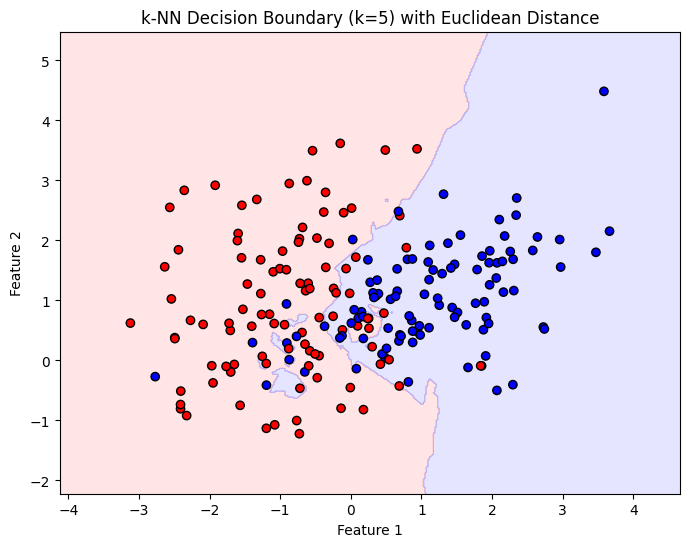

In [9]:
# Plot decision boundary
plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(["#FFAAAA", "#AAAAFF"])
cmap_bold = ListedColormap(["#FF0000", "#0000FF"])

plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=cmap_bold)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"k-NN Decision Boundary (k={k}) with Euclidean Distance")
plt.show()

## 📄 knn_regression

In [10]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
# Load dataset
X, y = fetch_california_housing(return_X_y=True)

In [12]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# Train k-NN Regressor
k = 5  # Number of neighbors
knn_regressor = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(metric='euclidean')

In [14]:
# Predict
y_pred = knn_regressor.predict(X_test)

In [15]:
# Evaluate
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")

Mean Squared Error: 1.14
R² Score: 0.13


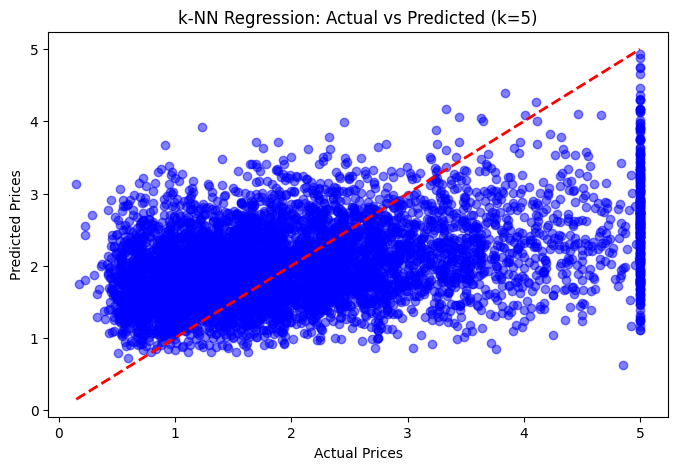

In [16]:
# Visualization (Actual vs Predicted)
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color="blue", alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "r--", linewidth=2)  # Line y=x
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title(f"k-NN Regression: Actual vs Predicted (k={k})")
plt.show()